In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(
    "cleaned_data_final.csv",
    parse_dates=['Learner SignUp DateTime', 'Opportunity Start Date', 'Opportunity End Date']
)


In [ ]:
print(df.columns)

Index(['Learner SignUp DateTime', 'Opportunity Id', 'Opportunity Name',
       'Opportunity Category', 'Opportunity End Date', 'First Name',
       'Date of Birth', 'Gender', 'Country', 'Institution Name',
       'Current/Intended Major', 'Entry created at', 'Status Description',
       'Status Code', 'Apply Date', 'Opportunity Start Date', 'Age'],
      dtype='object')


In [ ]:
#create derived columns
df['Signup_Month'] = df['Learner SignUp DateTime'].dt.month_name()
df['Signup_Day'] = df['Learner SignUp DateTime'].dt.day
df['Completion_Days'] = (df['Opportunity End Date'] - df['Opportunity Start Date']).dt.days.abs()

SIGNUP GROWTH OVERTIME

C:\Users\Marium Imran\AppData\Local\Temp\ipykernel_300\678025093.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  signup_monthly = df.groupby(pd.Grouper(key='Learner SignUp DateTime', freq='M')).size()


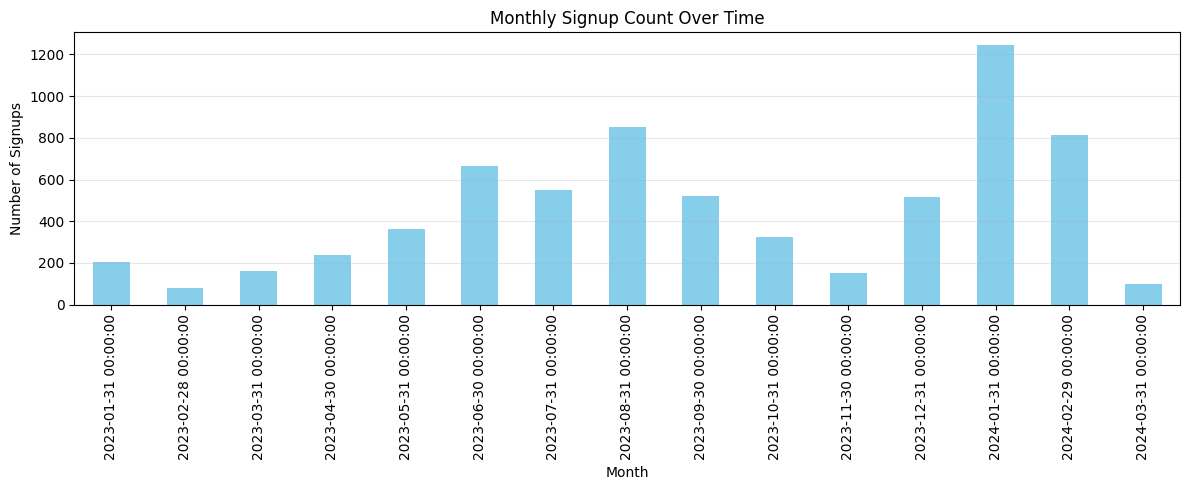

In [ ]:
plt.figure(figsize=(12, 5))
signup_monthly = df.groupby(pd.Grouper(key='Learner SignUp DateTime', freq='M')).size()
signup_monthly.plot(kind='bar', color='skyblue')
plt.title('Monthly Signup Count Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Signup Seasonality Heatmap

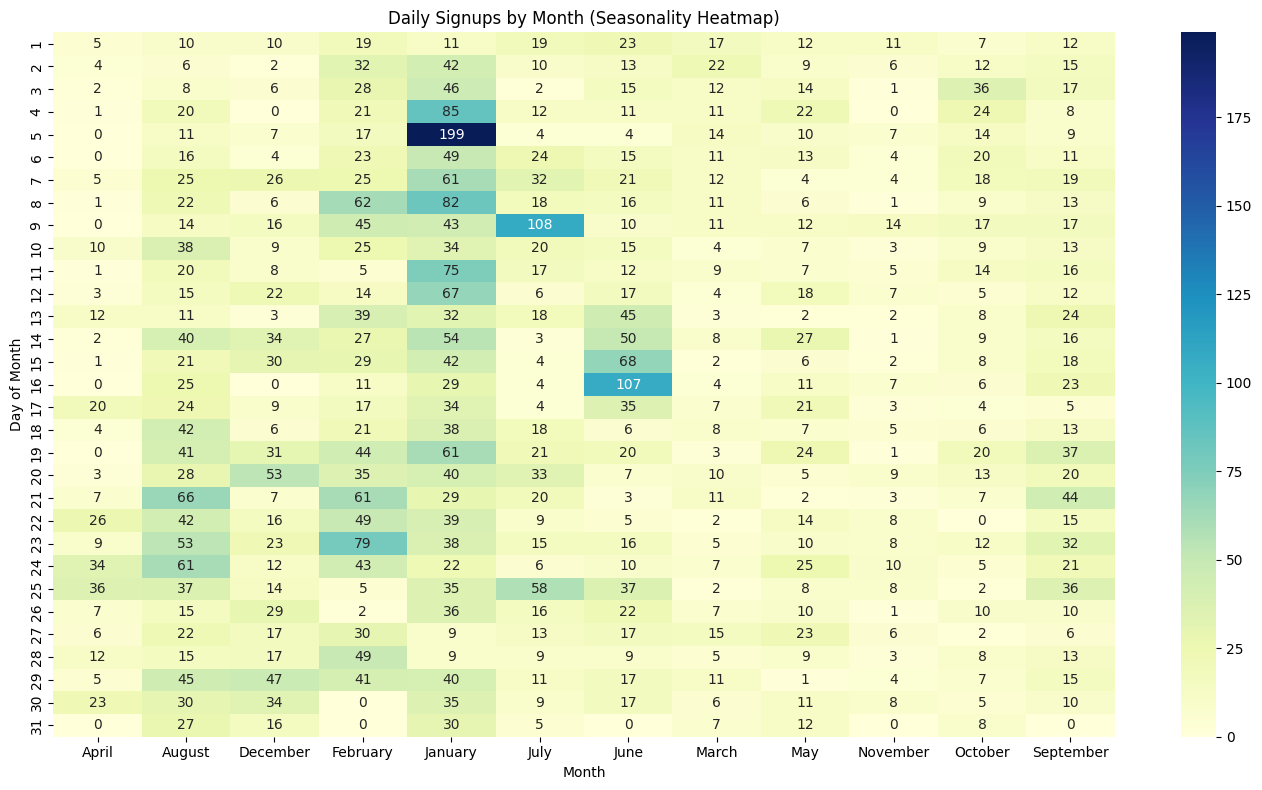

In [ ]:
heatmap_data = df.pivot_table(index='Signup_Day', columns='Signup_Month', 
                              values='Opportunity Id', aggfunc='count', fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Daily Signups by Month (Seasonality Heatmap)')
plt.xlabel('Month')
plt.ylabel('Day of Month')
plt.tight_layout()
plt.show()

Spikes/Drops in Signups

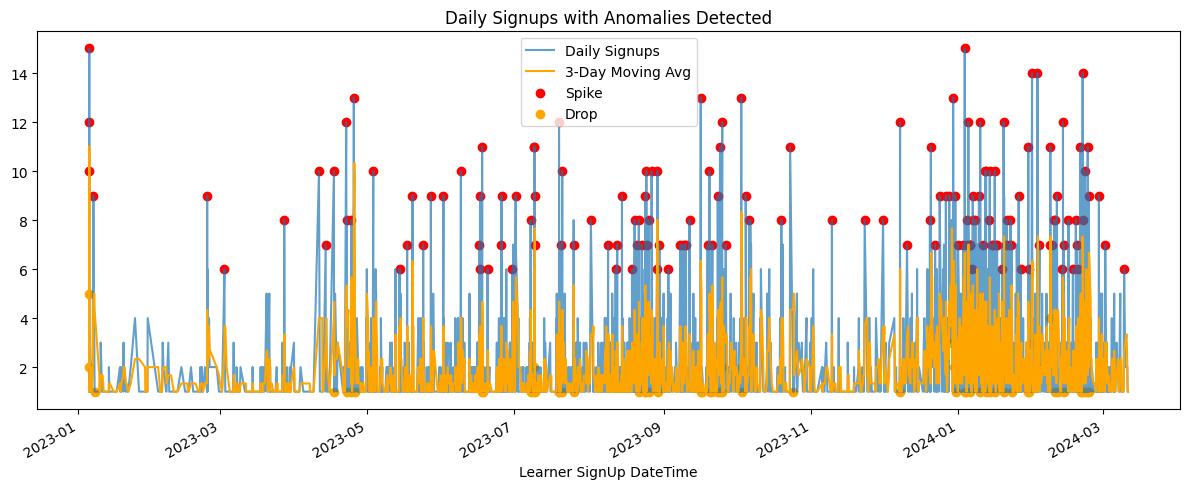

In [ ]:
daily_signups = df.groupby('Learner SignUp DateTime').size()
rolling_avg = daily_signups.rolling(window=3).mean()
anomalies = daily_signups - rolling_avg


plt.figure(figsize=(12, 5))
daily_signups.plot(label='Daily Signups', alpha=0.7)
rolling_avg.plot(label='3-Day Moving Avg', color='orange')
spikes = daily_signups[anomalies > 2 * anomalies.std()]
drops = daily_signups[anomalies < -2 * anomalies.std()]
plt.scatter(spikes.index, spikes, color='red', label='Spike')
plt.scatter(drops.index, drops, color='orange', label='Drop')
plt.title('Daily Signups with Anomalies Detected')
plt.legend()
plt.tight_layout()
plt.show()

Completion Trends

C:\Users\Marium Imran\AppData\Local\Temp\ipykernel_300\142152041.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(key='Opportunity End Date', freq='M')).size()


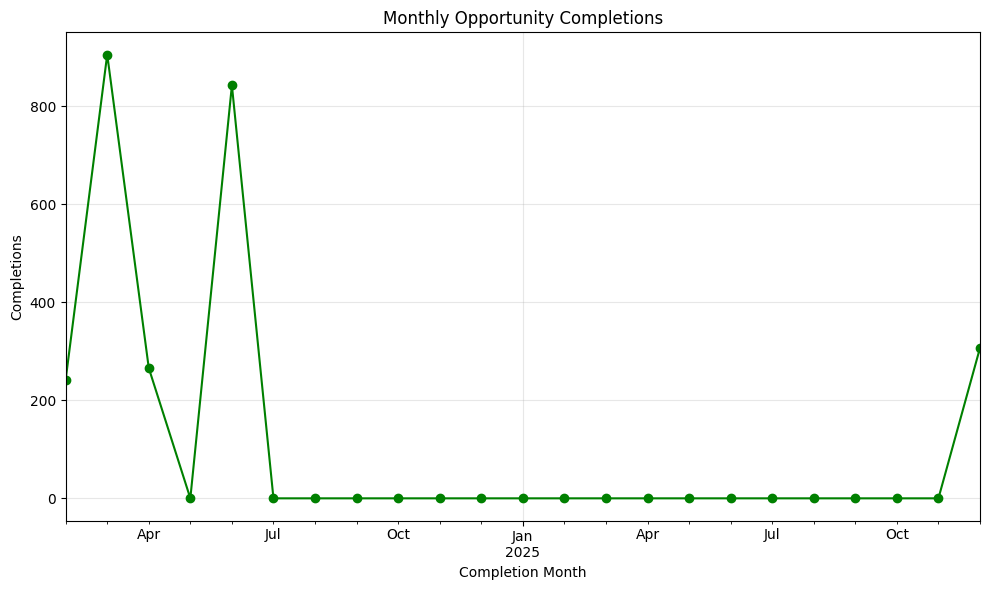

In [ ]:
# Define "completion" as either 'Team Allocated' or 'Rewards Award'
completion_statuses = ['Team Allocated', 'Rewards Award']

# ========== 4. Completion Trends Over Time ==========
completion_monthly = df[df['Status Description'].isin(completion_statuses)].groupby(
    pd.Grouper(key='Opportunity End Date', freq='M')).size()

plt.figure(figsize=(10, 6))
completion_monthly.plot(marker='o', color='green')
plt.title('Monthly Opportunity Completions')
plt.xlabel('Completion Month')
plt.ylabel('Completions')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


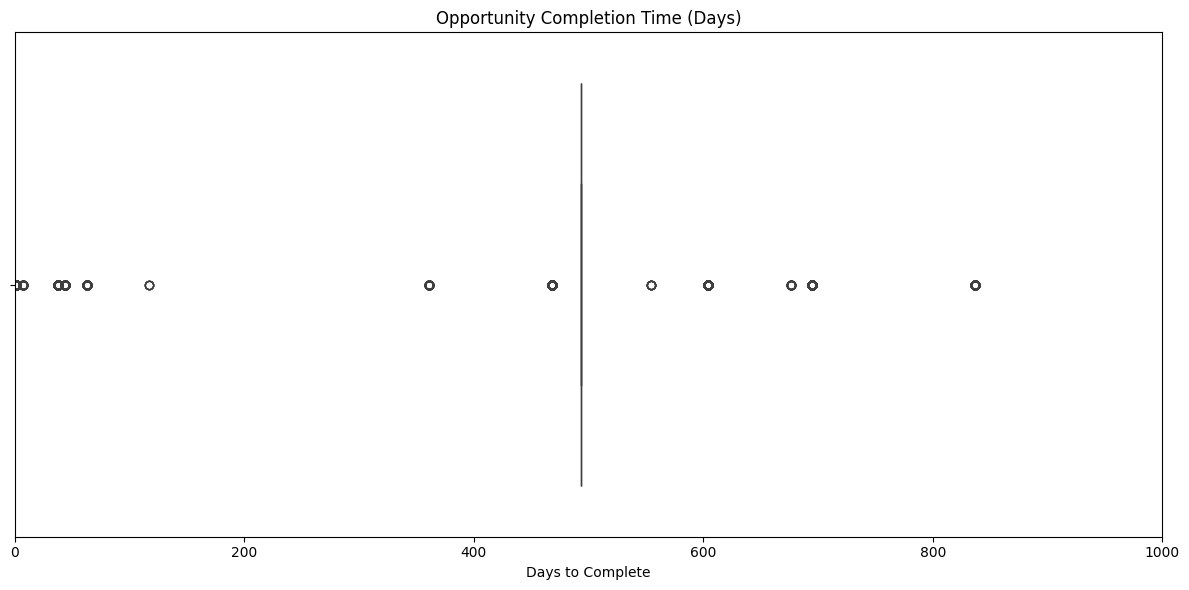

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Completion_Days'], showfliers=True)
plt.title('Opportunity Completion Time (Days)')
plt.xlabel('Days to Complete')
plt.xlim(0, 1000)
plt.tight_layout()
plt.show()

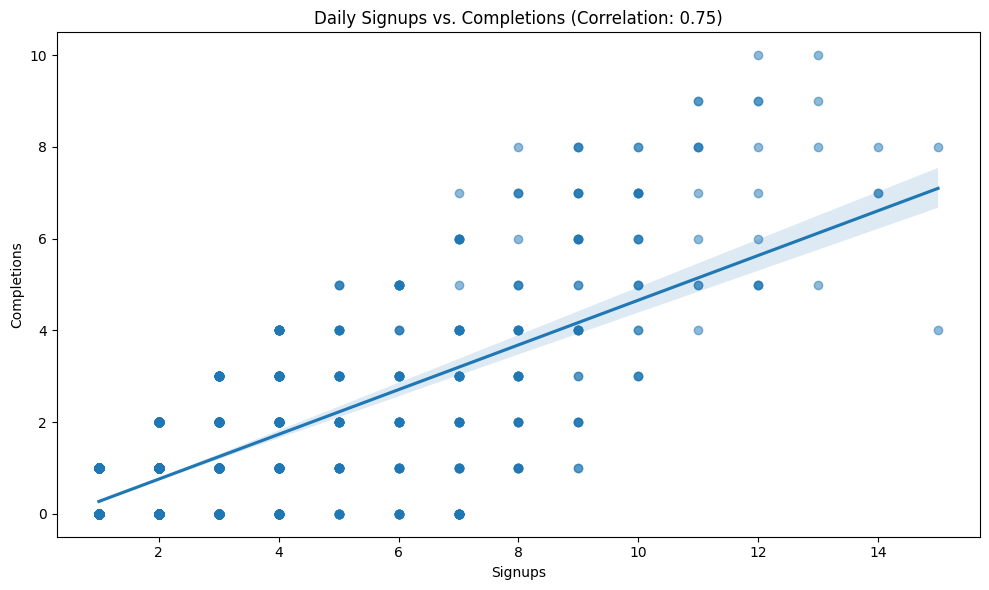

In [ ]:
daily_data = df.groupby('Learner SignUp DateTime').agg(
    Signups=('Opportunity Id', 'count'),
    Completions=('Status Description', lambda x: x.isin(completion_statuses).sum())
)
plt.figure(figsize=(10, 6))
sns.regplot(x='Signups', y='Completions', data=daily_data, scatter_kws={'alpha':0.5})
plt.title(f'Daily Signups vs. Completions (Correlation: {daily_data.corr().iloc[0,1]:.2f})')
plt.tight_layout()
plt.show()

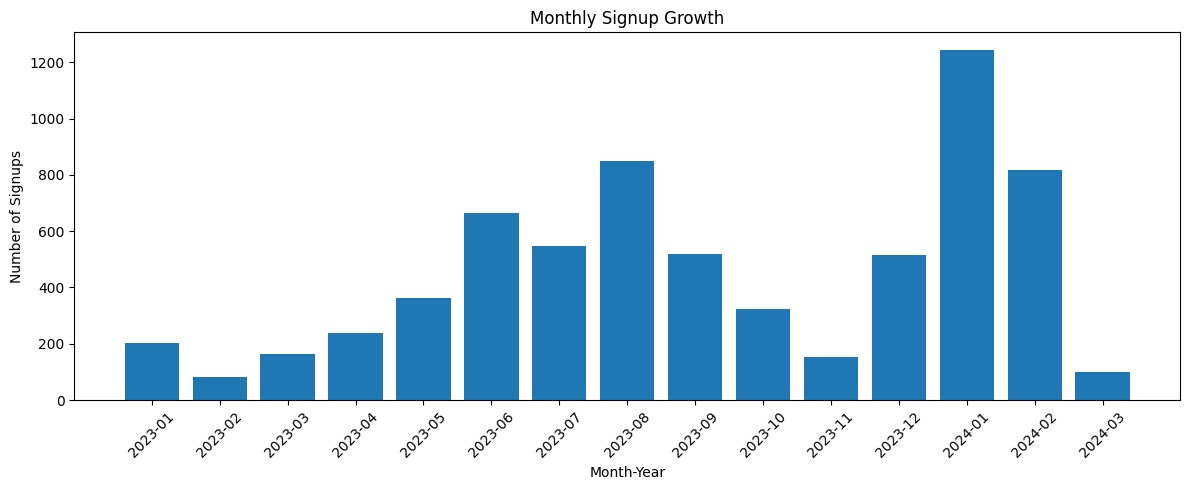

In [ ]:
# 1. Growth: bar chart of monthly signups
plt.figure(figsize=(12, 5))
plt.bar(monthly_counts.index, monthly_counts.values)
plt.title("Monthly Signup Growth")
plt.xlabel("Month-Year")
plt.ylabel("Number of Signups")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

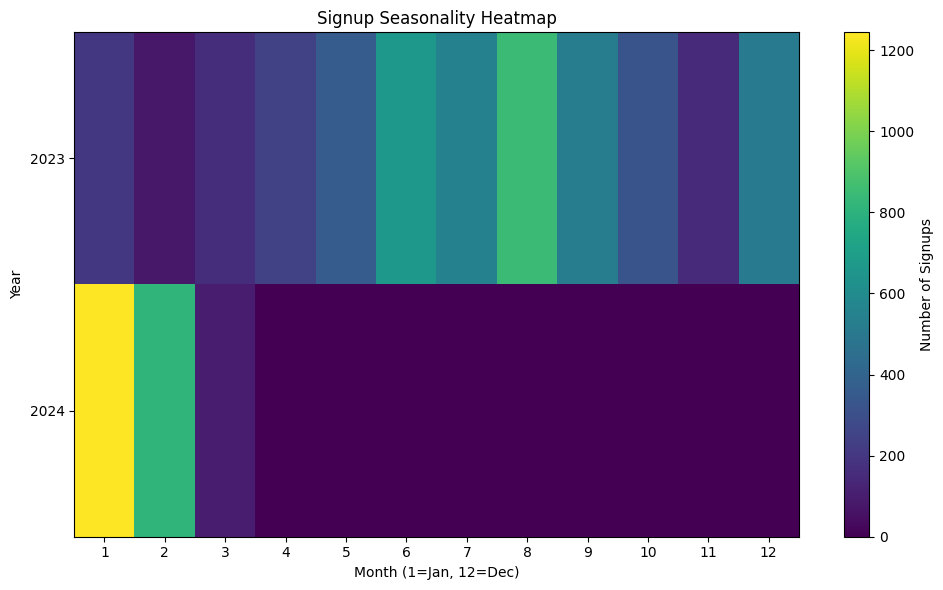

In [ ]:
# 2. Seasonality: heatmap of signups by month and year
df['Year'] = df['Learner SignUp DateTime'].dt.year
df['MonthNum'] = df['Learner SignUp DateTime'].dt.month
season_pivot = df.groupby(['Year', 'MonthNum']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
plt.imshow(season_pivot, aspect='auto')
plt.colorbar(label='Number of Signups')
plt.title("Signup Seasonality Heatmap")
plt.xlabel("Month (1=Jan, 12=Dec)")
plt.ylabel("Year")
plt.xticks(ticks=range(12), labels=list(range(1, 13)))
plt.yticks(ticks=range(len(season_pivot.index)), labels=season_pivot.index)
plt.tight_layout()
plt.show()

Largest increase (spike) in signups: 2024-01 (+730)
Largest decrease (drop) in signups: 2024-03 (-718)


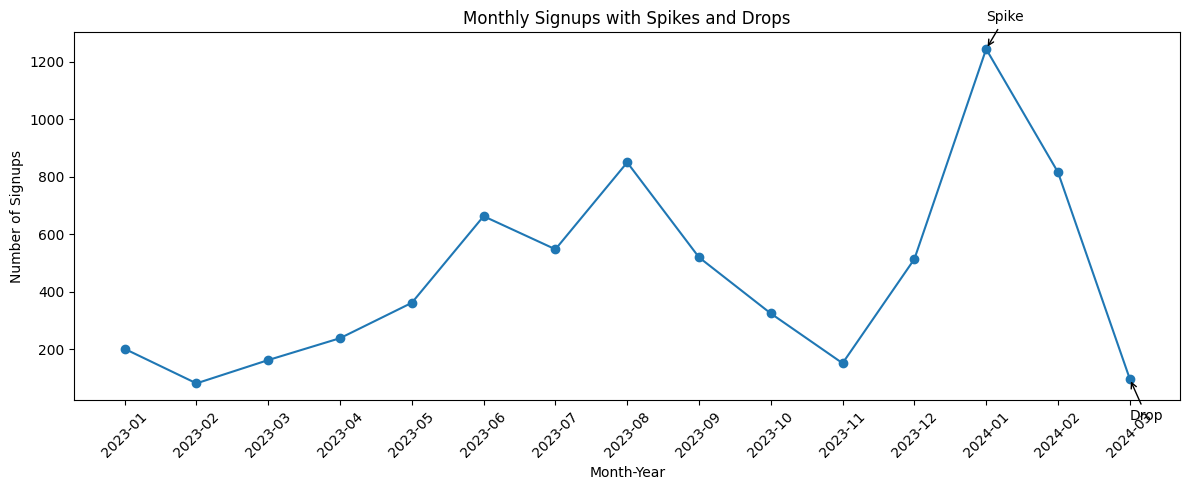

In [ ]:
# 3. Spikes/Drops: identify and plot
diff = monthly_counts.diff()
max_spike = diff.idxmax()
max_drop = diff.idxmin()
max_spike_val = int(diff[max_spike])
max_drop_val = int(diff[max_drop])

print(f"Largest increase (spike) in signups: {max_spike} (+{max_spike_val})")
print(f"Largest decrease (drop) in signups: {max_drop} ({max_drop_val})")

plt.figure(figsize=(12, 5))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o')
plt.title("Monthly Signups with Spikes and Drops")
plt.xlabel("Month-Year")
plt.ylabel("Number of Signups")
plt.xticks(rotation=45)
# Annotate spike and drop points
plt.annotate('Spike', xy=(max_spike, monthly_counts[max_spike]), xytext=(0, 20), textcoords='offset points', arrowprops=dict(arrowstyle='->'))
plt.annotate('Drop', xy=(max_drop, monthly_counts[max_drop]), xytext=(0, -30), textcoords='offset points', arrowprops=dict(arrowstyle='->'))
plt.tight_layout()
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6778 entries, 0 to 6777
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Learner SignUp DateTime  6778 non-null   datetime64[ns]
 1   Opportunity Id           6778 non-null   object        
 2   Opportunity Name         6778 non-null   object        
 3   Opportunity Category     6778 non-null   object        
 4   Opportunity End Date     6778 non-null   object        
 5   First Name               6778 non-null   object        
 6   Date of Birth            6778 non-null   object        
 7   Gender                   6778 non-null   object        
 8   Country                  6778 non-null   object        
 9   Institution Name         6778 non-null   object        
 10  Current/Intended Major   6778 non-null   object        
 11  Entry created at         6778 non-null   object        
 12  Status Description       6778 non-

Demographics Analysis

C:\Users\Marium Imran\AppData\Local\Temp\ipykernel_300\4247106724.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Completion Rate', data=gender_rate, palette='viridis')


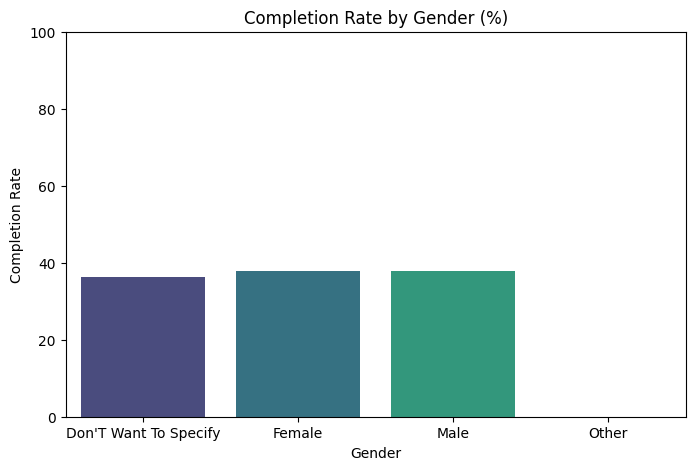

In [ ]:
# Completion rate by Gender
gender_rate = df.groupby('Gender')['Status Description'].apply(
    lambda x: x.isin(completion_statuses).mean() * 100).reset_index(name='Completion Rate')

plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Completion Rate', data=gender_rate, palette='viridis')
plt.title('Completion Rate by Gender (%)')
plt.ylabel('Completion Rate')
plt.ylim(0, 100)
plt.show()

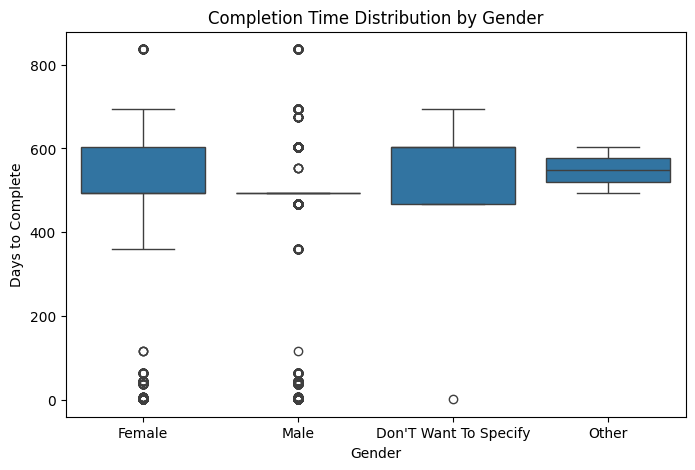

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Completion_Days', data=df[df['Completion_Days'].between(0, 1000)])
plt.title('Completion Time Distribution by Gender')
plt.ylabel('Days to Complete')
plt.show()

Status Outliers

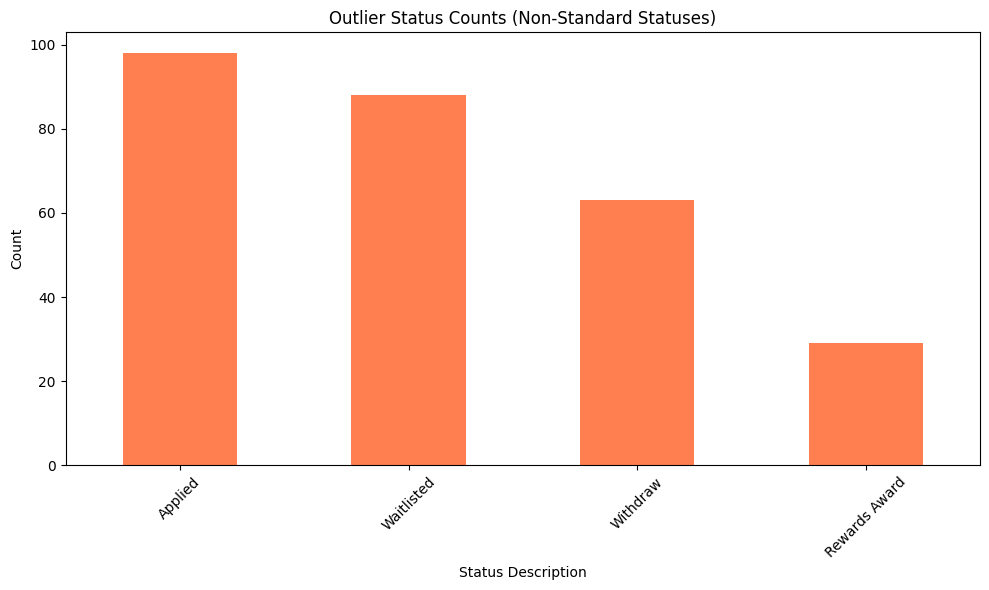

In [ ]:
valid_statuses = ["Team Allocated", "Started", "Rejected", "Dropped Out"]
status_counts = df['Status Description'].value_counts()
outlier_statuses = status_counts[~status_counts.index.isin(valid_statuses)]

plt.figure(figsize=(10, 6))
outlier_statuses.plot(kind='bar', color='coral')
plt.title('Outlier Status Counts (Non-Standard Statuses)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Low completion Days

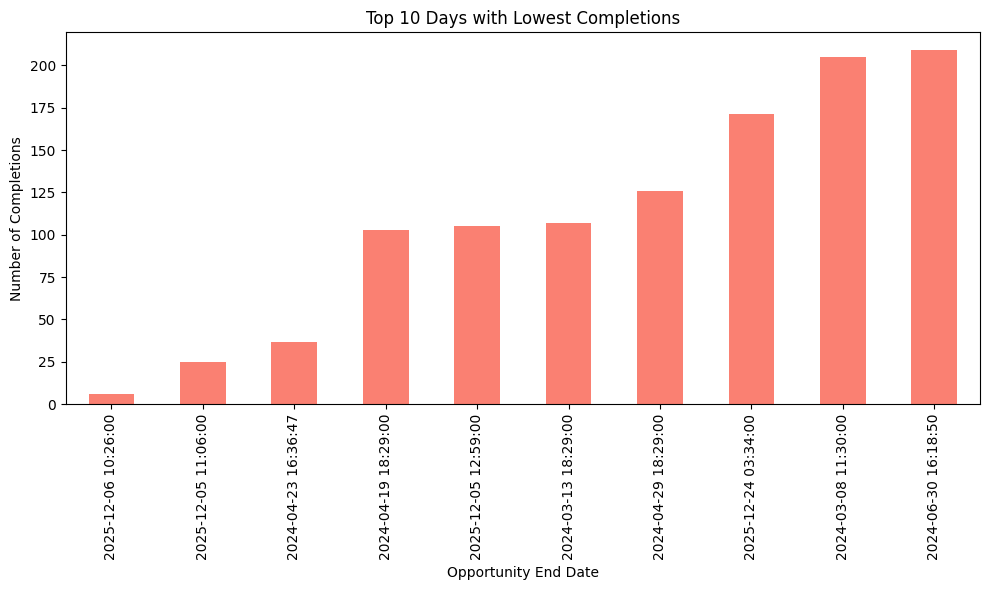

In [ ]:
low_days = df[df['Status Description'].isin(completion_statuses)].groupby(
    'Opportunity End Date')['Status Description'].count().nsmallest(10)

plt.figure(figsize=(10, 6))
low_days.plot(kind='bar', color='salmon')
plt.title('Top 10 Days with Lowest Completions')
plt.ylabel('Number of Completions')
plt.tight_layout()
plt.show()